<a href="https://colab.research.google.com/github/hdpark1208/StudyCode/blob/main/2)%EC%83%98%ED%94%8C%EB%A7%81_%ED%8E%B8%ED%96%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2-1 훈련세트와 테스트세트


#**줄거리**
1. 앞서 했었던 생선 데이터(Sample)를 준비한다

2. KNN 모델 객체를 만든다

3. 슬라이싱(Slicing)을 이용해 데이터를 훈련 세트와 테스트 세트로 나눈 후 모델을 평가한다

4. 모델의 성능이 망가졌음을 확인하고 이는 샘플링 편향(Sampling bias) 때문임을 이해한다

5. 넘파이(Numpy) 를 이용해 생선 데이터를 초기화하고 인덱스를 랜덤하게 섞은 후 훈련시킨다

6. 훈련, 테스트 세트가 잘 섞였는지 맷플롯을 통해 시각적으로 확인하고 성능을 다시 평가해본다



#Note

지도 학습 : 입력과 타겟을 전달하여 모델을 훈련시키는 학습

비지도 학습 : 타겟 데이터 없이 모델을 훈련시키는 학습

훈련 세트 : 모델을 훈련할 때 사용하는 데이터 

테스트 세트 : 모델을 테스트할 때 사용하는 데이터 (주로 전체 데이터의 20~30% 정도로 설정)


##Numpy
###import numpy as np
random.seed() : 랜덤 함수의 결과를 동일하게 나타내고 싶을 때 사용  

arange() : 일정한 간격의 정수 또는 실수 배열을 만듬 

shuffle() : 주어진 배열을 랜덤하게 섞는다


#**코드**

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
fish_data = [[l,w] for l,w in zip(fish_length,fish_weight)]
fish_target = [1]*35 + [0]*14 
print(fish_data[0])
print(fish_data[0][0])

[25.4, 242.0]
25.4


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

train_input = fish_data[:35]
train_target = fish_target[:35]
test_input = fish_data[35:]
test_target = fish_target[35:]


In [ ]:
kn= kn.fit(train_input,train_target)
kn.score(test_input,test_target) # 샘플링 편향(sampling bias) 으로 인한 문제

0.0

In [ ]:
import numpy as np

input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

print(input_arr)

print(input_arr.shape)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
(49, 2)


In [ ]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

print(index)    #[0,1,2, ... ,47,48] 이 잘 섞였는지 확인



[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


In [ ]:
train_input = input_arr[index[:35]]    #잘 섞인 배열을 이용해 input, target 데이터 초기화
train_target = target_arr[index[:35]]

print(input_arr[13],train_input[0])

[ 32. 340.] [ 32. 340.]


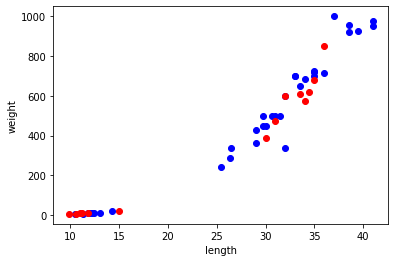

In [ ]:
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

import matplotlib.pyplot as plt
plt.scatter(train_input[:,0],train_input[:,1],c='b')    #잘 나뉘어 졌는지 시각적으로 표현
plt.scatter(test_input[:,0],test_input[:,1],c='r')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()



In [ ]:
kn = kn.fit(train_input, train_target)    #훈련 세트로 학습시키고

print(kn.predict(test_input))    #테스트 세트로 모델 성능 확인
print(test_target)

print(kn.score(test_input,test_target))

[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
[0 0 1 0 1 1 1 0 1 1 0 1 1 0]
1.0
